## 0. Install dependencies    

In [ ]:
!pip install -r requirements.txt

In [127]:
!pip install cryptography==36.0.2

                                              0.0/2.2 MB ? eta -:--:--
                                              0.0/2.2 MB 1.4 MB/s eta 0:00:02
                                              0.0/2.2 MB 1.4 MB/s eta 0:00:02
     --                                       0.1/2.2 MB 939.4 kB/s eta 0:00:03
     --                                       0.1/2.2 MB 939.4 kB/s eta 0:00:03
     ----                                     0.2/2.2 MB 1.0 MB/s eta 0:00:02
     ----                                     0.2/2.2 MB 1.0 MB/s eta 0:00:02
     -------                                  0.4/2.2 MB 1.3 MB/s eta 0:00:02
     ---------                                0.5/2.2 MB 1.4 MB/s eta 0:00:02
     ------------                             0.7/2.2 MB 1.6 MB/s eta 0:00:01
     ------------                             0.7/2.2 MB 1.6 MB/s eta 0:00:01
     ------------                             0.7/2.2 MB 1.6 MB/s eta 0:00:01
     ------------                             0.7/2.2 MB 1.6 MB/s e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 23.0.0 requires cryptography<40,>=38.0.0, but you have cryptography 36.0.2 which is incompatible.


In [8]:
!pip install opendatasets
!pip install pandas

In [438]:
import opendatasets as od
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from glob import glob
import os
import xml.etree.ElementTree as ET
from collections import Counter
from skimage.feature import hog
from skimage import exposure
import cv2
from PIL import Image

##  1. Download data

**Download the dataset straight from the Kaggle using Kaggle API**

(for more information https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/)

In [6]:
od.download("https://www.kaggle.com/datasets/khlaifiabilel/military-aircraft-recognition-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tymofiij
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 1.13G/1.13G [16:51<00:00, 1.19MB/s]


## 2. Analyze data

### 2.1 Dataset structure
**The Military Aircraft Recognition dataset contains diverse collection of airplane images captured under various conditions and camera angles. Dataset has 20 different types of military aircrafts. Images are labeled and each one may contain different types.<br>
<br>
The dataset consists of 3 folders:**
- Annotations:
    - Horizontal Bounding Boxes with 3842 xml files that describe types of planes in the picture and 2 points of a rectangle<br>
      that bound an aircraft 
    - Oriented Bounding Boxes with 3842 xml files that describe types of planes in the picture and 4 points of a rectangle<br>
      that bound an aircraft and its rotation angle (that is always 0)
<br>
<br>
- ImageSets:
    - Consists of 1 folder that has 2 txt files: test.txt (image numbers of test dataset) and train.txt (image numbers of train     dataset)
<br>
<br>
- JPEGImages has 3842 images of .jpg format that have differet shape (median width = 800 and height = 800) and even dimensions (usualy it's 3 and rarely 4)

**Analyzing amount of data, verifying format(whether all pictures are .jpg)**

In [359]:
def extract_numeric_part(filename):
    """
    extract_numeric_part helps to sort the files by extracting
    the numerical part so it can be sorted
    :param filename: filename of the folder. Has to contain "/" and not "\"
    :return: digits of the filename
    """ 
    filename = filename.split('/')
    return int(''.join(filter(str.isdigit, filename[-1])))


annotations_horizontal_boxes = os.listdir('military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/')
annotations_oriented_boxes = os.listdir("military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/")
images = os.listdir("military-aircraft-recognition-dataset/JPEGImages/")
print(len(annotations_horizontal_boxes))
print(len(annotations_horizontal))
print(len(annotations_oriented_boxes))
                    
annotations_horizontal_boxes = sorted(glob("military-aircraft-recognition-dataset/Annotations/Horizontal Bounding Boxes/*.xml"), key=extract_numeric_part)
annotations_oriented_boxes = sorted(glob("military-aircraft-recognition-dataset/Annotations/Oriented Bounding Boxes/*.xml"), key=extract_numeric_part)
images = sorted(glob("military-aircraft-recognition-dataset/JPEGImages/*.jpg"), key=extract_numeric_part)

print(len(images))
print(len(annotations_horizontal))
print(len(annotations_oriented_boxes))

3842
3842
3842
3842
3842
3842


**Analyzing if there are any notation with an angle > 0**

In [363]:
found = 0
for xml_file in annotations_oriented_boxes:
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for object_element in root.findall('.//object'):
        name_element = object_element.find('name')
        robndbox_element = object_element.find('robndbox')
        if name_element is not None and robndbox_element is not None:
            angle = int(object_element.find('angle').text)
            if angle!=0:
                print(xml_file)
                found += 1
print(found)

0


**Show frequency histogram of picture size + analyze dimensions**

In [244]:
sizes = []
for image in images:
    image = plt.imread(image)
    sizes.append(image.shape)
print(sizes)

[(831, 859, 3), (871, 767, 3), (789, 918, 3), (836, 845, 3), (859, 819, 3), (939, 974, 3), (866, 868, 3), (927, 738, 3), (812, 821, 3), (834, 752, 3), (885, 887, 3), (755, 875, 3), (869, 885, 3), (897, 845, 3), (851, 816, 3), (870, 886, 3), (872, 855, 3), (857, 922, 3), (884, 890, 3), (891, 853, 3), (888, 833, 3), (902, 856, 3), (682, 846, 3), (902, 894, 3), (946, 823, 3), (906, 792, 3), (900, 850, 3), (884, 876, 3), (891, 918, 3), (890, 919, 3), (923, 901, 3), (844, 881, 3), (869, 819, 3), (944, 838, 3), (867, 888, 3), (876, 889, 3), (898, 921, 3), (938, 862, 3), (885, 835, 3), (889, 930, 3), (836, 923, 3), (892, 852, 3), (889, 841, 3), (904, 893, 3), (907, 819, 3), (896, 881, 3), (928, 986, 3), (872, 862, 3), (698, 832, 3), (757, 742, 3), (881, 790, 3), (791, 886, 3), (780, 911, 3), (846, 839, 3), (715, 892, 3), (823, 833, 3), (817, 879, 3), (950, 935, 3), (848, 882, 3), (825, 883, 3), (852, 851, 3), (893, 843, 3), (930, 874, 3), (876, 824, 3), (885, 874, 3), (821, 891, 3), (731, 731

In [247]:
widths = [shape[0] for shape in sizes]
heights = [shape[1] for shape in sizes]
dimensions = [shape[2] for shape in sizes]

width_counts = dict(zip(*np.unique(widths, return_counts=True)))
height_counts = dict(zip(*np.unique(heights, return_counts=True)))
dimension_counts = dict(zip(*np.unique(dimensions, return_counts=True)))

In [248]:
width_median = np.median(widths)
height_median = np.median(heights)
dimension_median = np.median(dimensions)

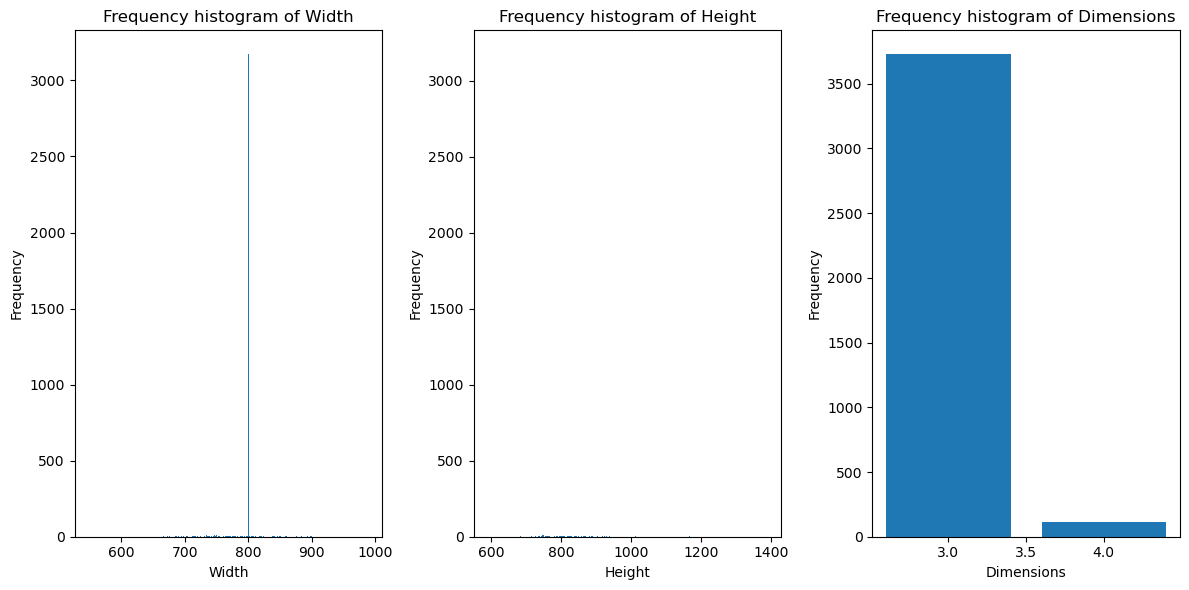

Median Width: 800.0
Median Height: 800.0
Median Dimensions: 3.0


In [364]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(width_counts.keys(), width_counts.values())
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Frequency histogram of Width')

plt.subplot(132)
plt.bar(height_counts.keys(), height_counts.values())
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Frequency histogram of Height')

plt.subplot(133)
plt.bar(dimension_counts.keys(), dimension_counts.values())
plt.xlabel('Dimensions')
plt.ylabel('Frequency')
plt.title('Frequency histogram of Dimensions')

plt.tight_layout()
plt.show()

print(f"Median Width: {width_median}")
print(f"Median Height: {height_median}")
print(f"Median Dimensions: {dimension_median}")

**Analyze distribution of pixel values whether there is any pattern
<br>(conclusion: distributions are usualy bimodal)**

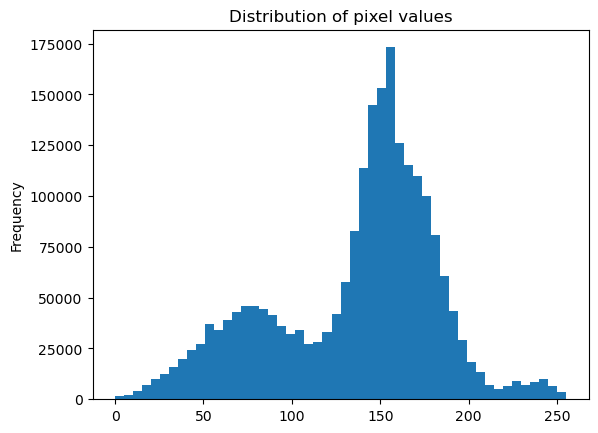

In [328]:
img = plt.imread(images[2])
pd.Series(img.flatten()).plot(kind="hist",bins=50, title = "Distribution of pixel values")
plt.show()

### 2.2 Training and test sets distribution
**Frequency of plane types in training and test sets distribution is counted and analyzed. The annotations horizontal boxes were selected since they are easier and faster to implement.
<br>
<br>
Having the results it was taken into consideration that train-test datasets should be swapped for better training if deep learning would be used (maybe use cross-validation techniques). There are 100+ up to 750+ images per type.**

In [409]:
def extract_obj(img_list, xml_list):
    """
    extract_obj crops out the planes out of picture
    and helps form the whole dataset
    :param img_list: list of paths of pictures
    :param xml_list: list of paths of xml files-notations(Horizontal Bounding Boxes)
    :return: list of tuple label(type of plane),image(array of pixels)
    """ 
    assert len(img_list) == len(xml_list), "length of image list needs to be equal to length of xml list"
    dataset = []
    for i in range(len(img_list)):
        
        image = cv2.imread(img_list[i]) 
        xml_file = xml_list[i]

        with open(xml_file, 'r') as file:
            tree = ET.parse(file)
            root = tree.getroot()
            for object_element in root.findall('.//object'):
                name_element = object_element.find('name')
                robndbox_element = object_element.find('bndbox')

                if name_element is not None and robndbox_element is not None:
                    label = name_element.text

                    x_left_bottom = int(robndbox_element.find('xmin').text)
                    y_left_bottom = int(robndbox_element.find('ymin').text)
                    x_right_top = int(robndbox_element.find('xmax').text)
                    y_right_top = int(robndbox_element.find('ymax').text)

                    cropped_image = image[(y_left_bottom):(y_right_top), (x_left_bottom):(x_right_top)]

                    dataset.append((label,cropped_image))
    return dataset

In [410]:
dataset = extract_obj(images, annotations_horizontal_boxes)

In [433]:
def get_class_frequencies(distribution_path, annotations_horizontal_boxes):
    """
    get_class_frequencies gets types of all the planes from distribution
    by counting them from each xml file
    :param distribution_path: path of the distribution file that countains
    numbers of image files 
    :param annotations_horizontal_boxes: path of the xml files folder
    :return:list that contains all types of recognized planes from each image of dataset
    """ 
    names = []
    with open(distribution_path, 'r') as file:
        numbers = [int(line.strip()) for line in file]
        for i in numbers:
            annotation = annotations_horizontal_boxes[i-1]
            tree = ET.parse(annotation)
            root = tree.getroot()
            for object_element in root.findall('.//object'):
                name_element = object_element.find('name')
                if name_element is not None:
                    names.append(name_element.text)
    return names

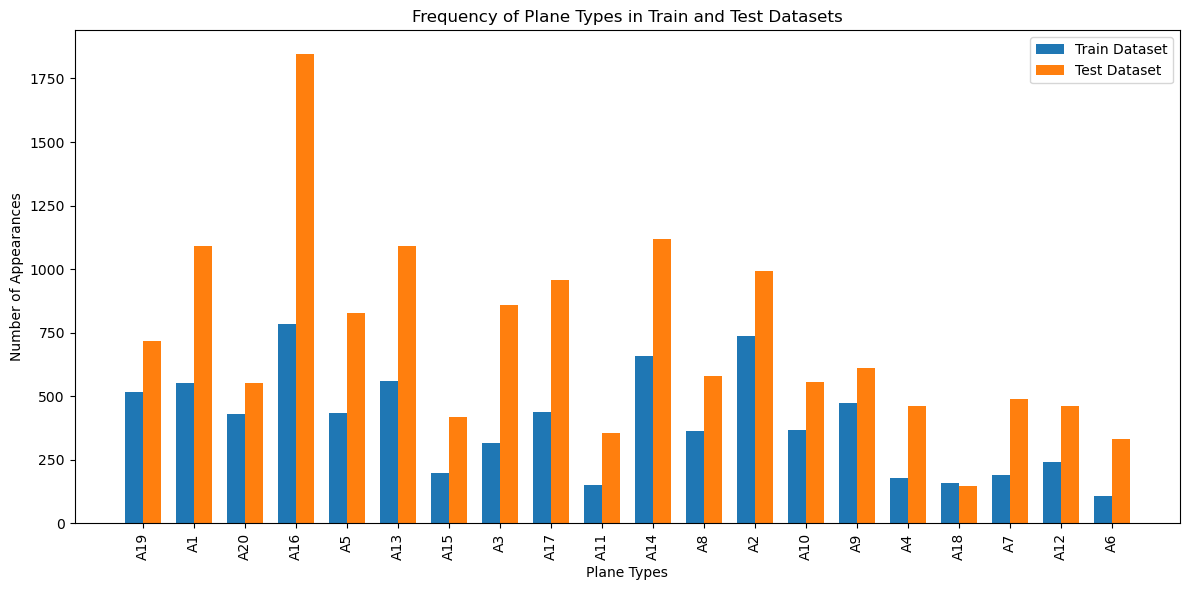

In [434]:
train_txt_path = 'military-aircraft-recognition-dataset/ImageSets/Main/train.txt'
test_txt_path = 'military-aircraft-recognition-dataset/ImageSets/Main/test.txt'

train_names = get_class_frequencies(train_txt_path, annotations_horizontal_boxes)
test_names = get_class_frequencies(test_txt_path, annotations_horizontal_boxes)

train_counter = Counter(train_names)
test_counter = Counter(test_names)

types = list(train_counter.keys())
train_counts = [train_counter[type] for type in types]
test_counts = [test_counter[type] for type in types]

plt.figure(figsize=(12, 6))
width = 0.35
x = range(len(types))

plt.bar(x, train_counts, width, label='Train Dataset')
plt.bar([i + width for i in x], test_counts, width, label='Test Dataset')

plt.xlabel('Plane Types')
plt.ylabel('Number of Appearances')
plt.title('Frequency of Plane Types in Train and Test Datasets')
plt.xticks([i + width/2 for i in x], types, rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()

plt.show()

### 2.3 Data visualization
**Plot example of some images and experiment with them applying feature extraction techniques such as HOG and SIFT.
<br>In our case the color doesn't play crusial role so for the more effective work it is recomended to remove it and leave grayscale.**

(789, 918, 3)


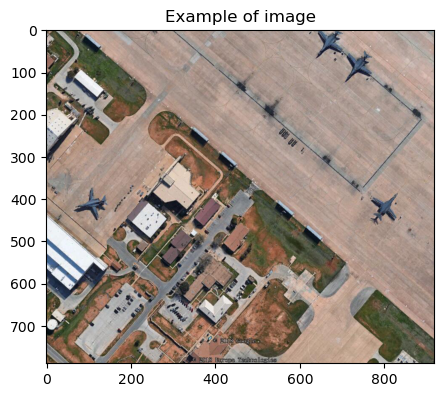

In [329]:
fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(img)
plt.title('Example of image')
print(img.shape)
plt.show()

#### HOG implementation

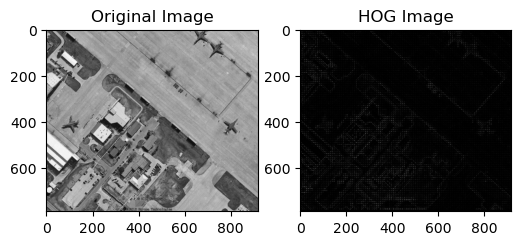

In [330]:
image = cv2.imread(images[2], cv2.IMREAD_GRAYSCALE)

features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

**Crop out the plane images**

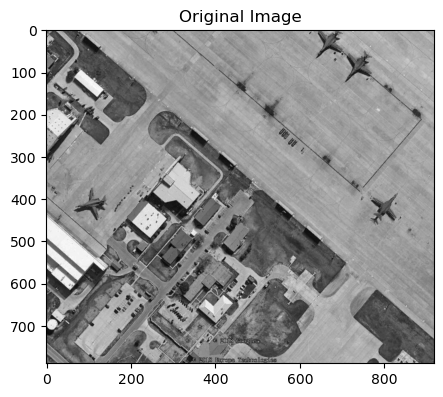

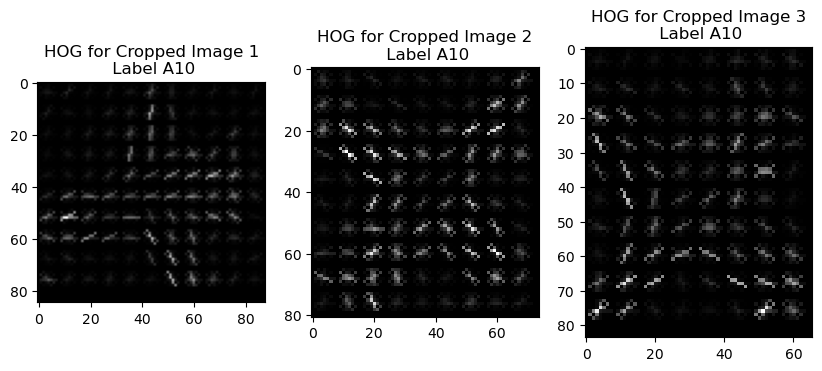

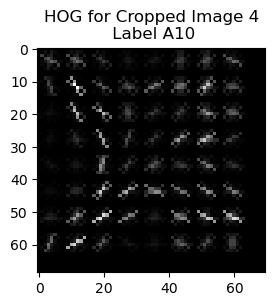

In [331]:
image = cv2.imread(images[2], cv2.IMREAD_GRAYSCALE)

xml_file = annotations_horizontal_boxes[2]
tree = ET.parse(xml_file)
root = tree.getroot()
cropped_images = []
for object_element in root.findall('.//object'):
    name_element = object_element.find('name')
    robndbox_element = object_element.find('bndbox')

    if name_element is not None and robndbox_element is not None:
        label = name_element.text

        x_left_top = float(robndbox_element.find('xmin').text)
        y_left_top = float(robndbox_element.find('ymin').text)
        x_right_top = float(robndbox_element.find('xmax').text)
        y_right_top = float(robndbox_element.find('ymax').text)

        cropped_region = image[int(y_left_top):int(y_right_top), int(x_left_top):int(x_right_top)]

        cropped_images.append((label,cropped_region))
        
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

for i in range(len(cropped_images)):
    if i % 3 == 0:
        # Create a new row of images every 3 images
        plt.figure(figsize=(10, 6))
    features, hog_image = hog(cropped_images[i][1], pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    plt.subplot(1, 3, i % 3 + 1)
    plt.title(f'HOG for Cropped Image {i + 1}\n Label {cropped_images[i][0]}')
    plt.imshow(hog_image, cmap=plt.cm.gray)
    if (i + 1) % 3 == 0 or (i + 1) == len(sift_features):
        # Show the row of images when 3 images have been added or it's the last iteration
        plt.show()
        
plt.show()


#### Scale-Invariant Feature implementation

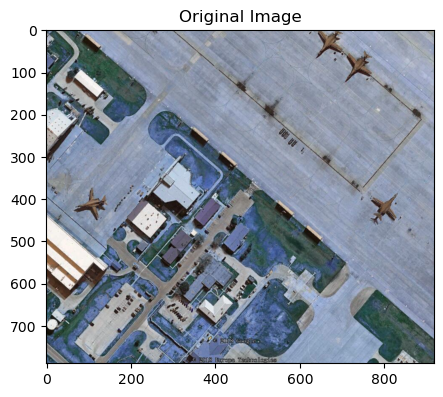

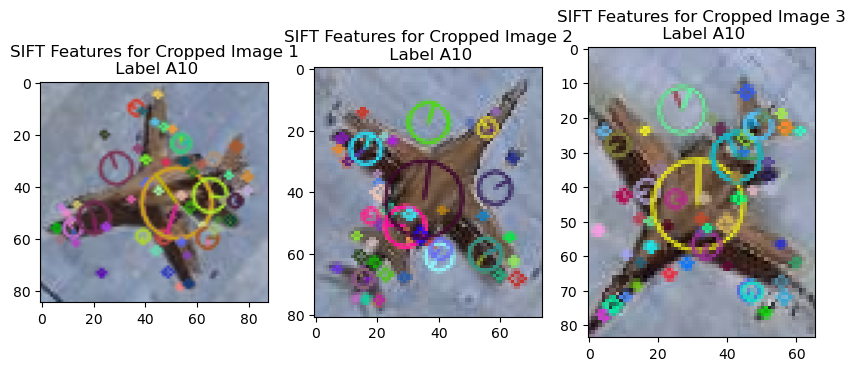

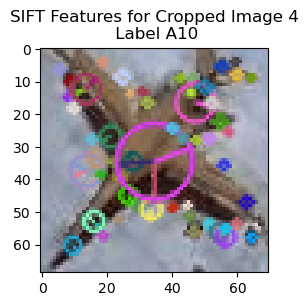

In [333]:
image = cv2.imread(images[2])


sift_features = []

xml_file = annotations_horizontal_boxes[2]
tree = ET.parse(xml_file)
root = tree.getroot()
cropped_images = []
for object_element in root.findall('.//object'):
    name_element = object_element.find('name')
    bndbox_element = object_element.find('bndbox')
    if name_element is not None and bndbox_element is not None:
        label = name_element.text
        x_left_top = int(bndbox_element.find('xmin').text)
        y_left_top = int(bndbox_element.find('ymin').text)
        x_right_bottom = int(bndbox_element.find('xmax').text)
        y_right_bottom = int(bndbox_element.find('ymax').text)

        cropped_region = image[y_left_top:y_right_bottom, x_left_top:x_right_bottom]

        sift = cv2.SIFT_create()

        key_points, descriptors = sift.detectAndCompute(cropped_region, None)

        sift_features.append((key_points, descriptors))   
        
        cropped_images.append((label,cropped_region))
        
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

for i, (key_points, descriptors) in enumerate(sift_features):
    if i % 3 == 0:
        plt.figure(figsize=(10, 6))

    plt.subplot(1, 3, i % 3 + 1)
    plt.imshow(cropped_images[i][1], cmap=plt.cm.gray)
    plt.title(f'SIFT Features for Cropped Image {i + 1}\n Label {cropped_images[i][0]}')
    img_with_keypoints = cv2.drawKeypoints(cropped_images[i][1], key_points, outImage=cropped_images[i][1], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_keypoints, cmap=plt.cm.gray)

    if (i + 1) % 3 == 0 or (i + 1) == len(sift_features):
        plt.show()

plt.show()



## 3. Further steps
**Having analyzed the dataset and applied feature extraction techniques such as HOG and SIFT the project is ready to begin ML part. Let's implement ML classification model based on CNN, since it is resistant to some drawbacks of our dataset (different scale, rotation) and then try to implement ML model based on HOG and SIFT. After classification is done we can start object detection part.**
<br> 
<br>
**First of all we need prepare the dataset:**
- Resize all images to a consistent size
- Normalize the pixel values
- Data Augmentation
- Balancing Classes
- Data Split

## 4. Dataset preparation
**As we discovered before, our data is not that clean and structured, so we need to prepare it for the future usage.**

### 4.1 Standardizing dimensions
**Standardizing dimensions is a common preprocessing step in computer vision tasks to ensure that all images in our dataset have the same dimensions.**
<br> **Kaggle provides Dataset Notebooks where we can find other people experimenting with the dataset. Some of the ideas were inspireed by NICKO REESE**
<br>https://www.kaggle.com/code/nickoreese/military-aircraft-recognition?scriptVersionId=143235915&cellId=9 

In [451]:
def pad_img(img):
    
    '''
    pad_img transforms an image to the desired size. 
    If squared, the image remains the same in ratio; 
    if rectangular, it'll be padded evenly to become a squared one.
    
    :param img: A NumPy array representing the input image.
    :return: A NumPy array representing the transformed image.
    '''
    
    # Convert the NumPy array to a PIL Image
    img = Image.fromarray(np.uint8(img))
    
    # Get the dimensions of the image
    old_size = img.size
    # Define the desired size to transform the image to
    desired_size = (64, 64)
    
    # Calculate the maximum dimension of the original image
    max_dim = max(old_size)
    
    # Create a new image with the max_dim as the width and height
    padded = Image.new("RGB", (max_dim, max_dim))
    
    # Calculate the padding for the image to make it square
    x = (max_dim - old_size[0]) // 2
    y = (max_dim - old_size[1]) // 2
    
    # Paste the original image onto the padded image at the calculated position
    padded.paste(img, (x, y))
    
    # Resize the padded image to the desired size
    out_img = padded.resize(desired_size)
    
    # Convert the result back to a NumPy array
    out_img = np.array(out_img)
    
    # Return the transformed image as a NumPy array
    return out_img


In [452]:
X = [pad_img(dataset[i][1]) for i in range(len(dataset))]
Y = dataset[:][0]

In [340]:
# Flatten the list of labels and convert to numpy array
orig_labels = list(itertools.chain(*Y))
orig_labels_np = np.array(orig_labels).reshape(-1, 1)

# Encode the labels
encoder = OneHotEncoder()
y = encoder.fit_transform(orig_labels_np).toarray()

X_list = []

# Normalize and create a list of image arrays
for img in X:
    for obj in img:
        X_list.append(np.array(obj)/255.0)

# Convert the list of images to an array
X = np.array(X_list)

return X, y, orig_labels_np

In [341]:
# Get features and labels
X, y, orig_labels = preprocessing(train_data)
n_labels = y.shape[1]

# Display some of the padded objects
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))
ax0.imshow(X[np.argmin(train_obj_dims)//2], cmap='gray')
ax1.imshow(X[30], cmap='gray')
ax2.imshow(X[np.argmax(train_obj_dims)//2], cmap='gray')

NameError: name 'train_data' is not defined